 Task 1: Data Cleaning & Preprocessing
    * Objective: Learn how to clean and prepare raw data for ML.
    * Tools: Python, Pandas, NumPy, Matplotlib/Seaborn

In [1]:
# import pandas numpy matplotlib 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [2]:
# load csv file into dat a frame
data_file = pd.read_csv('C:\\Users\\prach\\Downloads\\Titanic-Dataset.csv')

In [3]:
data_file.head()   # see the first few rows 
data_file.info()   # checks the columns and data types 
data_file.describe() # get starts about numberical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#Typical missing data in Titanic:
#Age: some passengers don’t have age info
#Cabin: many missing values
#Embarked: a few missing

data_file.isnull().sum()  # check for missing values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
data_file['Age'] = data_file['Age'].fillna(data_file['Age'].median()) 
#Age (numerical): Fill with median or mean
if data_file['Embarked'].dtype =='0':
    embarked_mode = data_file['Embarked'].mode()
    if not embarked_mode.empty:
        data_file['Embarked'] = data_file['Embarked'].fillna(embarked_mode[0])
    else:
        print("Warning: 'Embarked' has no model")


#Embarked (categorical): Fill with mode

In [95]:
#cabin : too many missing may be drop the column
if 'Cabin' in data_file.columns:   ## Drop 'Cabin' if it exists
    data_file = data_file.drop('Cabin', axis=1)


In [102]:
# convert categorial to numbers 
if 'Sex' in data_file.columns:
    data_file['sex'] =data_file['Sex'].map({'male':0, 'female':1})  #create a new column 
    data_file.drop('Sex', axis=1, inplace=True)

if data_file['Embarked'].isnull().all():
    data_file.drop('Embarked', axis=1, inplace=True)

if 'Embarked' in data_file.columns:
    if data_file['Embarked'].isnull().any():
        mode_value = data_file['Embarked'].mode()
        if not mode_value.empty:
            data_file['Embarked'] = data_file['Embarked'].fillna(mode_value[0])
    data_file['Embarked'] = data_file['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    
# if 'Embarked' in data_file.columns:
#     data_file['Embarked'] = data_file['Embarked'].fillna(data_file['Embarked'].mode()[0])
#     data_file['Embarked'] = data_file['Embarked'].map({'S':0, 'C' :1, 'Q':2})


In [103]:
# drop the unnecessary column
# Drop only the columns that exist
columns_to_drop = ['Cabin', 'Name', 'Ticket', 'PassengerId', 'sex']
existing_cols = [col for col in columns_to_drop if col in data_file.columns]
data_file.drop(existing_cols, axis=1, inplace=True)

# data_file.drop(['Cabin','sex','Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [104]:
# 5. Scale Age and Fare
scaler = StandardScaler()
data_file[['Age', 'Fare']] = scaler.fit_transform(data_file[['Age', 'Fare']])

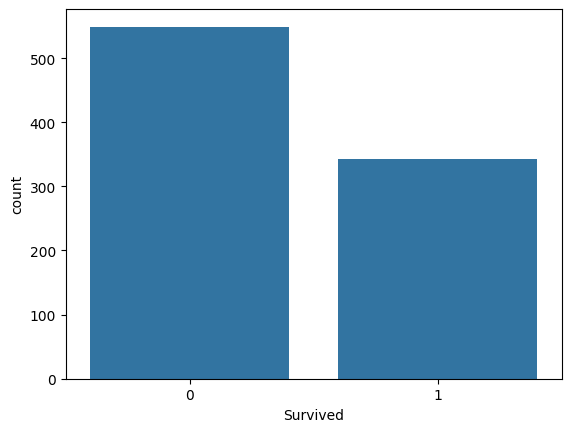

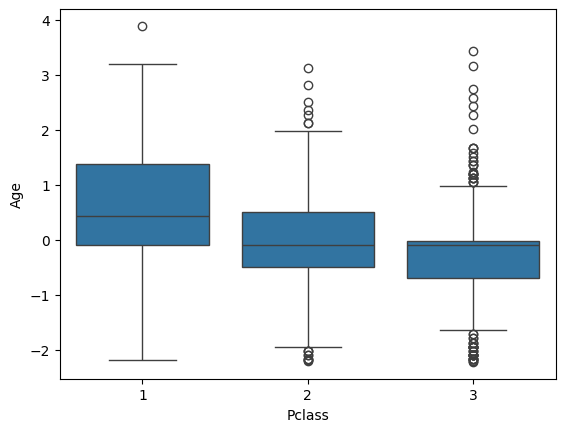

In [105]:

# Visualise  for better understanding 
# lets plot who survied and how  age, sex, or class affected survival.
sns.countplot(x='Survived', data=data_file)
plt.show()

sns.boxplot(x='Pclass', y='Age', data = data_file)
plt.show()

In [106]:

# scaler = StandardScaler()
# data_file[['Age', 'Fare']] = scaler.fit_transform(data_file[['Age', 'Fare']])


In [107]:
# final check 
print(data_file.head())
print(data_file.info())

   Survived  Pclass       Age  SibSp  Parch      Fare
0         0       3 -0.565736      1      0 -0.502445
1         1       1  0.663861      1      0  0.786845
2         1       3 -0.258337      0      0 -0.488854
3         1       1  0.433312      1      0  0.420730
4         0       3  0.433312      0      0 -0.486337
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB
None


In [ ]:
# ✅ Result:
# All columns are numeric ✅
# No NaN values ✅
# Data is ready for ML models ✅